In [1]:
import numpy as np
import cv2 as cv
import pandas as pd

In [2]:
def rotate_image_and_joints(image, joints, center, angle):
    """ 
    rotate image & points by the given angle
    modified code from https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/
    """
    # grab the dimensions of the image
    (h, w) = image.shape[:2]
    
    # determine the center    
#     (cX, cY) = (w // 2, h // 2)
    (cX, cY) = center
 
    # grab the rotation matrix (applying the negative of the angle to rotate clockwise)
    M = cv.getRotationMatrix2D((cX, cY), -angle, 1.0)
    print(M)

    image_rotated = cv.warpAffine(image, M, (w, h))
        
    """
    # grab the sine and cosine (i.e., the rotation components of the matrix)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    print(M)
    
    
    # perform the actual rotation on the given image
    image_rotated = cv.warpAffine(image, M, (nW, nH))
    """

    # rotate joints
    n= joints.shape[0]    
    joints_rotated = np.c_[ joints.copy(), np.ones(n)] * np.mat(M).transpose()
    
    return image_rotated, joints_rotated


In [3]:
# test
csv_filename = '/var/data/MET2/activity1.csv'
met = pd.read_csv(csv_filename, header=None)

met.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,112,72,105,98,98,113,122,68,121,50


In [4]:
# load image
imageIdx = 0
image_filename = met.loc[imageIdx][0]
image = cv.imread('/var/data/MET2/'+image_filename)
print(image.shape)

# load joints
joints = np.array(met.loc[imageIdx][1:1+14*2]).reshape(-1,2)
print(joints)

(213, 170, 3)
[[113 172]
 [113 147]
 [137 117]
 [119 117]
 [123 153]
 [142 181]
 [146 120]
 [143 100]
 [135 73]
 [112 72]
 [105 98]
 [98 113]
 [122 68]
 [121 50]]


In [5]:
degree = 15  # degree to rotate to clock-wise direction
center= joints[12,:] # neck

center_hip = np.mean(joints[2:4,:],axis=0)
print(center_hip)
center_torso =  (center_hip + joints[12,:]) * 0.5
print(center_torso)

#print("Rotating {} degrees around {}".format(degree, center))   # rotate around neck
print("Rotating {} degrees around {}".format(degree, center_torso))  # rotate around the center of torso
image_rotated, joints_rotated = rotate_image_and_joints(image, joints, center, degree)


[128.0 117.0]
[125.0 92.5]
Rotating 15 degrees around [125.0 92.5]
[[  0.96592583  -0.25881905  21.75674426]
 [  0.25881905   0.96592583 -29.25887969]]


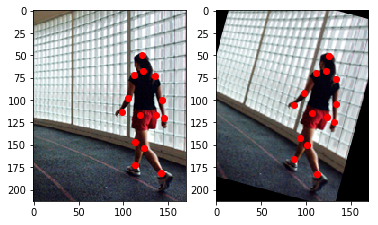

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.plot(joints[:,0], joints[:,1], 'or')

plt.subplot(122)
plt.imshow(image_rotated[:,:,::-1])
plt.plot(joints_rotated[:,0], joints_rotated[:,1], 'or')

